In [200]:
import numpy as np
import pandas as pd

In [201]:
df = pd.read_csv('dataset_of_life_except.csv')

In [202]:
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [203]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [204]:
df.dropna(inplace=True)

In [205]:
df.duplicated().sum()

np.int64(0)

In [206]:
alchol_per_year = df.groupby('Year')["Alcohol"].sum().reset_index()

In [207]:
import seaborn as sns


<Axes: xlabel='Year', ylabel='Alcohol'>

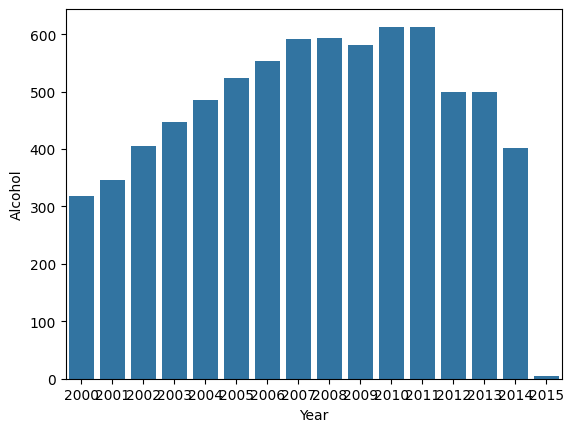

In [208]:
sns.barplot(x='Year', y='Alcohol', data=alchol_per_year)

In [209]:
infantdeath_peryear = df.groupby('Year')["infant deaths"].sum().reset_index()

<Axes: xlabel='Year', ylabel='infant deaths'>

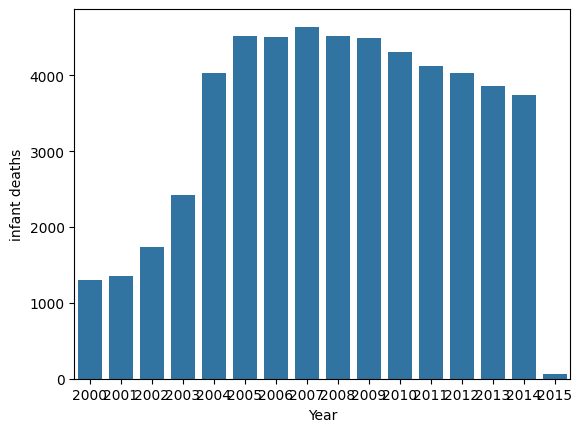

In [210]:
sns.barplot(x='Year', y='infant deaths', data=infantdeath_peryear)

# convert all the categorical data into numerical data 


In [211]:
from sklearn import preprocessing


In [212]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [213]:
encoder = preprocessing.LabelEncoder()

In [214]:
df['Country'] = encoder.fit_transform(df['Country'])

In [215]:
encoder.classes_

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cyprus',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati',
       'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Lithuania',
       'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia'

In [216]:
df['Status'] = encoder.fit_transform(df['Status']) 

In [217]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


# make the boxplot for each columns

In [218]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [219]:
selected_columns = ['Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

In [220]:
import matplotlib.pyplot as plt

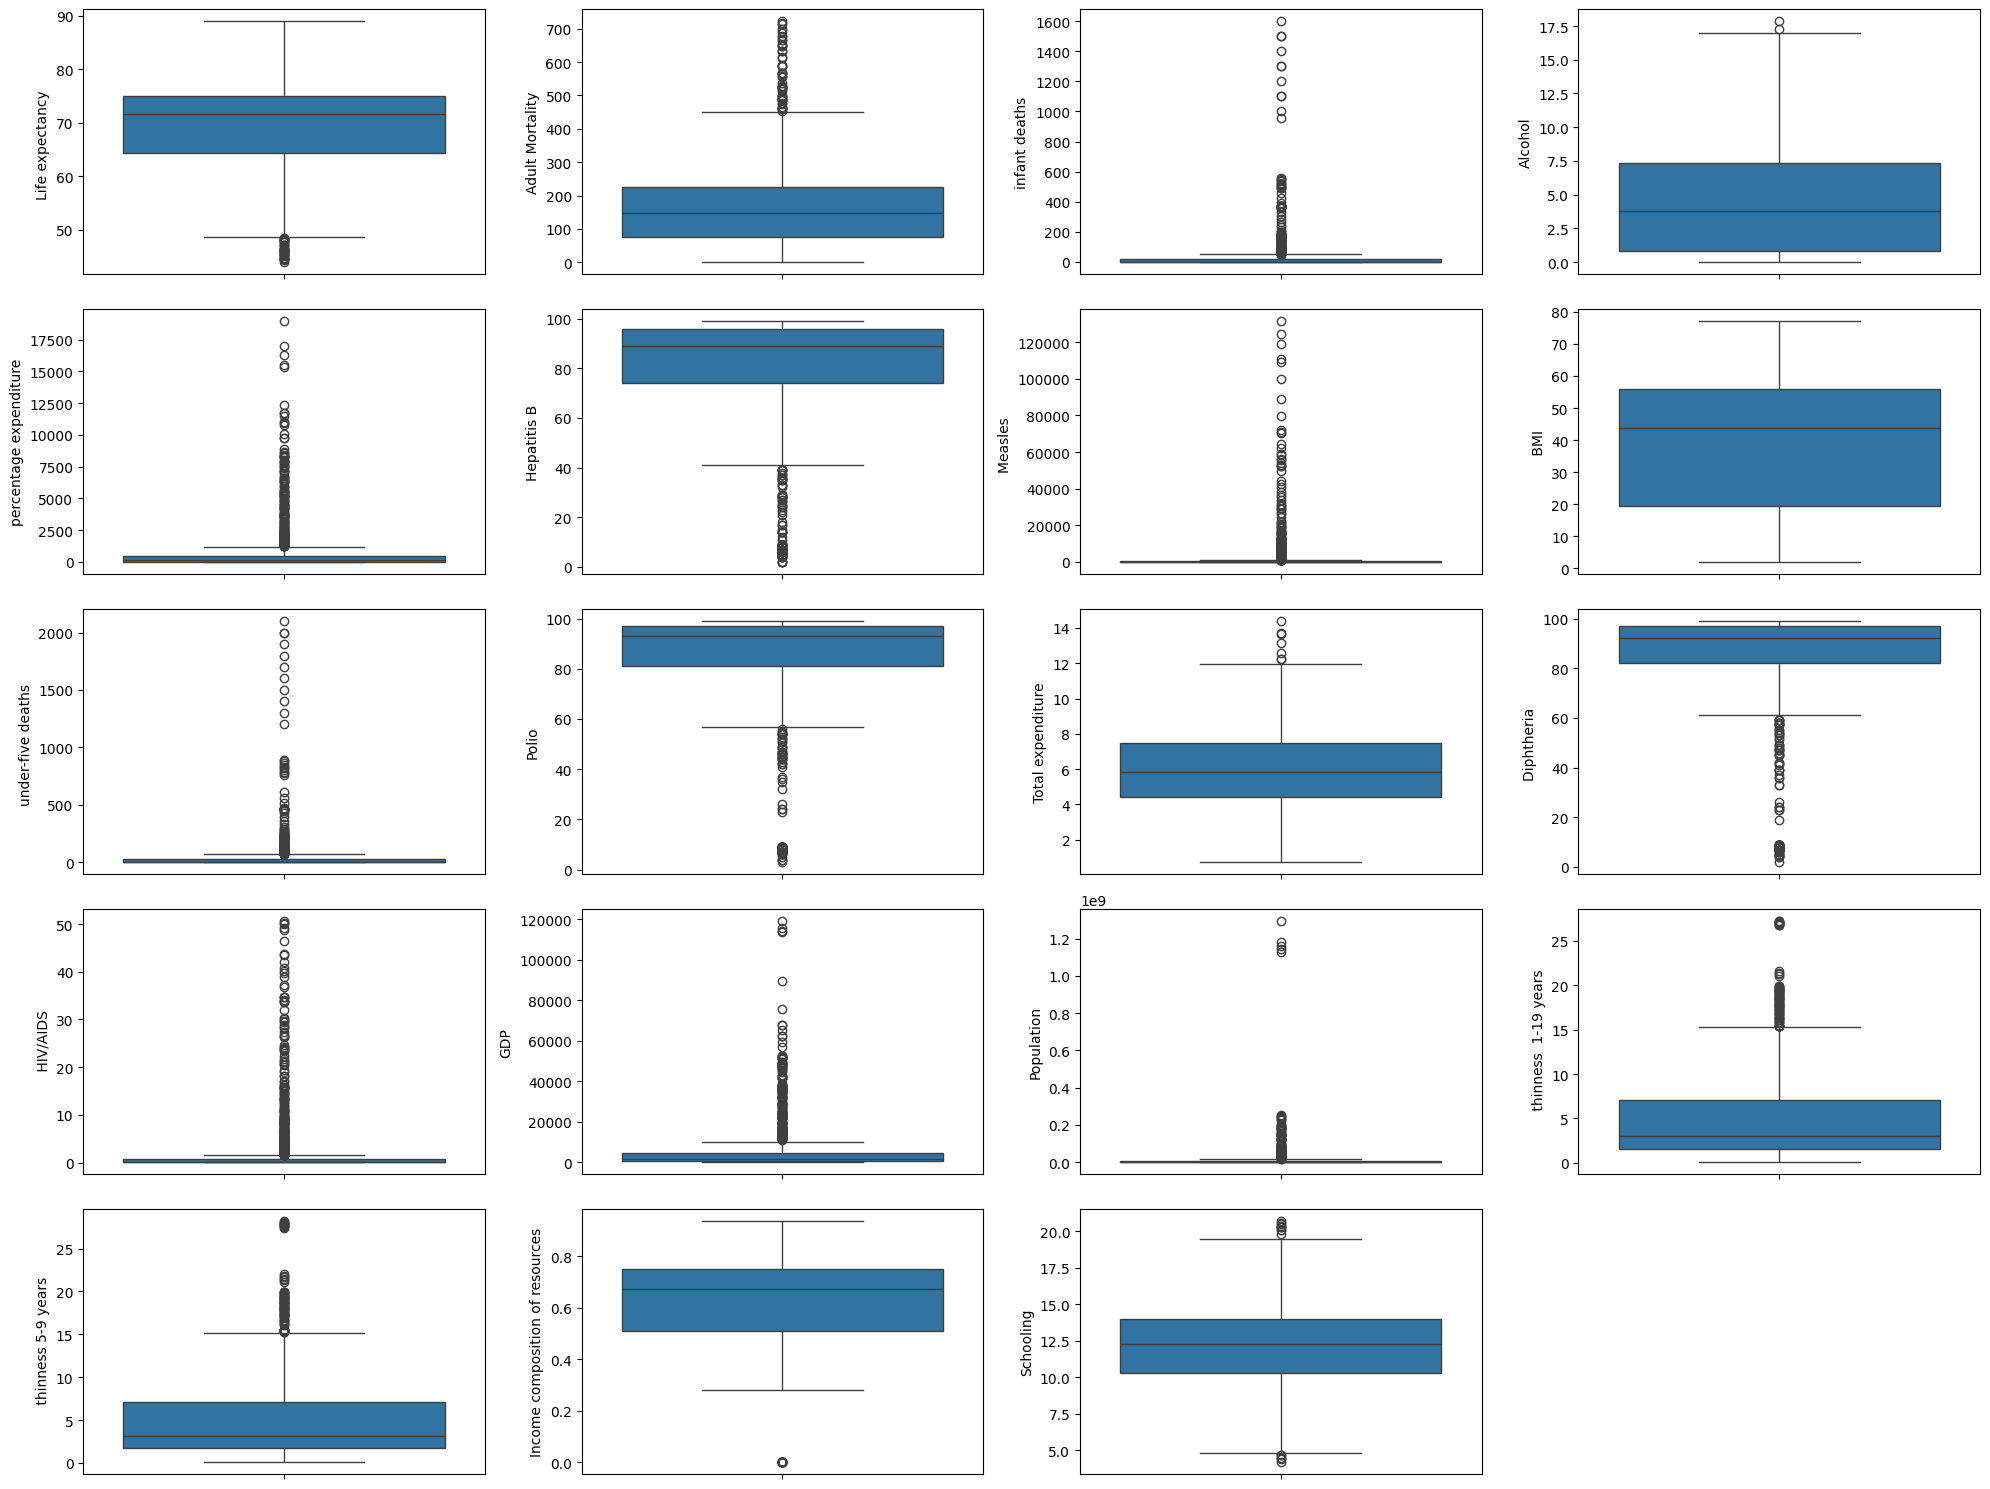

In [221]:
plt.figure(figsize=(20, 15))  # Set the overall figure size
for i, column in enumerate(selected_columns, 1):
    plt.subplot(5, 4, i)  # Define the layout (5 rows, 4 columns)
    sns.boxplot(y=df[column])  # Create a boxplot for each column
    plt.tight_layout()  # Adjust spacing to prevent overlap

plt.show()  # Display the plot

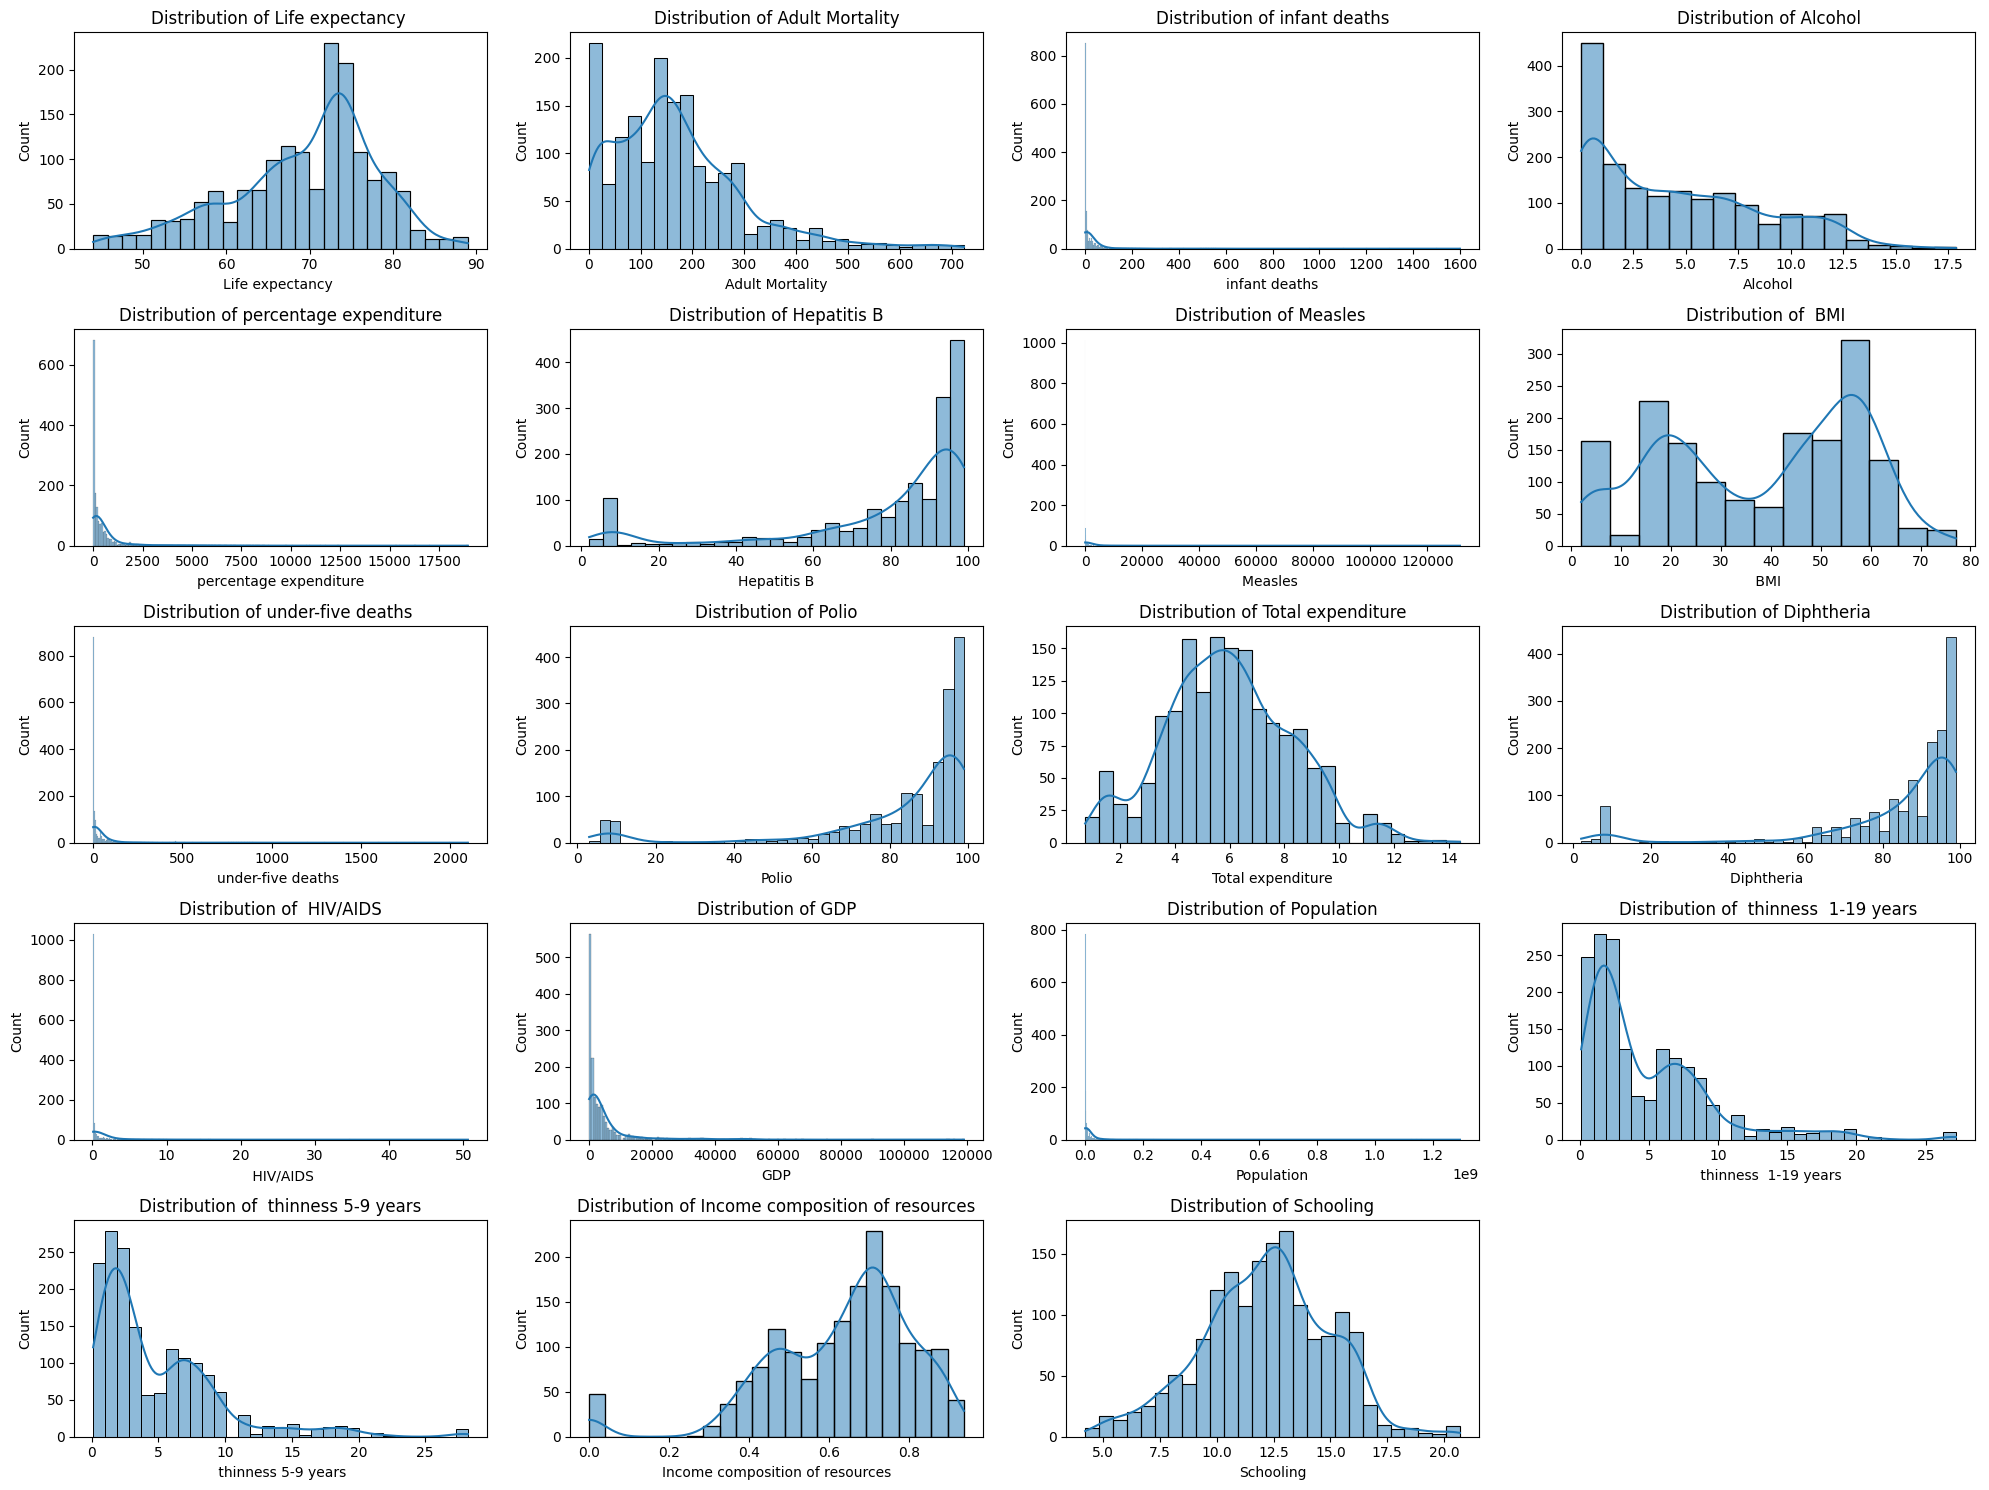

In [222]:
n_rows = 5
n_column = 4
fig, axes = plt.subplots(n_rows, n_column, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(selected_columns,1):  # Loop through each column and create a boxplot for each column
    sns.histplot(data = df, x = col, kde = True, ax = axes[i-1])
    axes[i-1].set_title(f'Distribution of {col}')


for i in range(len(selected_columns), len(axes)):
    axes[i].set_visible(False)
plt.tight_layout()
plt.show()

In [223]:
bell_shaped_col = ['Life expectancy ', 'Total expenditure', 'Income composition of resources','Schooling']

In [224]:
upper_limit = df['Total expenditure'].mean() + 3*df['Total expenditure'].std()
lower_limit = df['Total expenditure'].mean() - 3 * df['Total expenditure'].std() 

In [225]:
df[(df['Total expenditure'] < lower_limit) | (df['Total expenditure'] > upper_limit)]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1386,65,2007,1,65.0,211.0,0,0.68,188.710877,96.0,0,73.4,0,93.0,13.66,94.0,0.1,1357.632211,96311.0,0.2,0.1,0.574,11.8
1496,69,2009,1,59.2,277.0,10,3.75,5.592170,64.0,6,24.0,13,84.0,14.39,81.0,2.1,33.667491,3811528.0,7.6,7.4,0.400,9.7
1603,75,2014,1,78.2,62.0,0,0.01,2051.748615,99.0,0,26.2,0,99.0,13.73,99.0,0.1,7716.241500,41.0,13.6,13.7,0.693,12.7
2303,108,2009,1,47.1,433.0,28,3.97,49.837127,84.0,31,21.2,42,81.0,13.13,84.0,1.7,394.593244,63126.0,8.5,8.4,0.375,8.5


In [226]:
df_new = df[(df['Total expenditure'] >= lower_limit) & (df['Total expenditure'] <= upper_limit)]

In [227]:
df_new

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,0,2015,1,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,0,2014,1,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,0,2013,1,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,0,2012,1,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,0,2011,1,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,132,2004,1,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,132,2003,1,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,132,2002,1,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,132,2001,1,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


<Axes: ylabel='Total expenditure'>

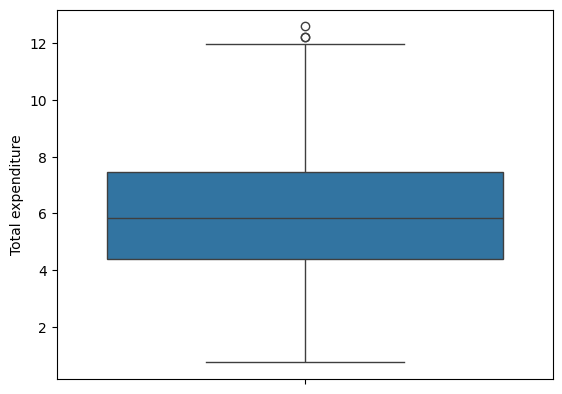

In [228]:
sns.boxplot(y = df_new['Total expenditure'])

In [229]:
new_df_capped = df.copy()

In [230]:
new_df_capped['Total expenditure'] = np.where(
    (df['Total expenditure'] > upper_limit),
    upper_limit,
    np.where(
        df['Total expenditure'] < lower_limit,
        lower_limit,
        df['Total expenditure']
    )
)

<Axes: ylabel='Total expenditure'>

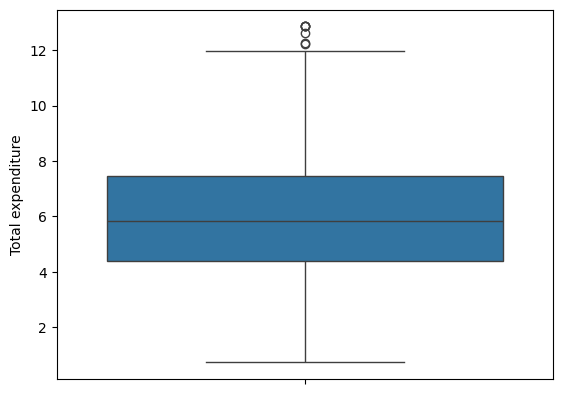

In [231]:
sns.boxplot(data = new_df_capped, y = 'Total expenditure')

In [232]:
new_df_capped.shape

(1649, 22)

# Triming the outliers by using z-score

In [233]:
def detect_outliers_zscore(df_delete, coloumn):
    for col in coloumn:
        upper_limit = df_delete[col].mean() + 3*df_delete[col].std()
        lower_limit = df_delete[col].mean() - 3*df_delete[col].std()  # Detect outliers using z-scores and return the list of detected outliers for each column in a dataframe
        
        #trim the data

        df_delete = df_delete[(df_delete[col] > lower_limit) & (df_delete[col] < upper_limit)]
    return df_delete

In [234]:
new_df = detect_outliers_zscore(df, bell_shaped_col)

In [235]:
new_df.shape

(1595, 22)

# Box plot of before and after trimming the data using z-score

<Axes: ylabel='Schooling'>

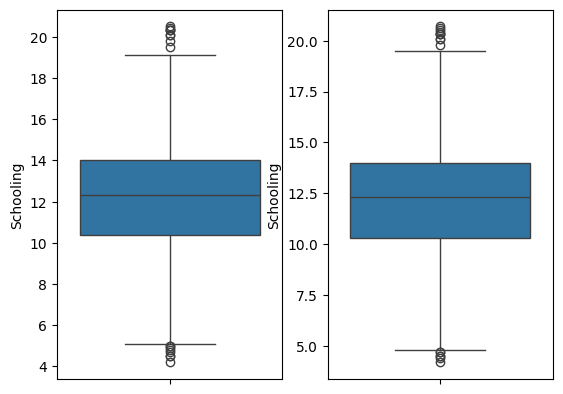

In [236]:
plt.subplot(1, 2, 1)
sns.boxplot(y = new_df['Schooling'])
plt.subplot(1, 2, 2)
sns.boxplot(data = df, y = 'Schooling')

In [237]:
import matplotlib.pyplot as plt
import seaborn as sns

def boxplot_before_and_after(df_before, df_after, columns):
    plt.figure(figsize=(10, 5 * len(columns)))  # Dynamically set figure size based on the number of columns
    
    for i, col in enumerate(columns):
        # Plot 'Before' boxplot
        plt.subplot(len(columns), 2, 2 * i + 1)  # Subplot for the 'before' plot
        sns.boxplot(y=df_before[col])
        plt.title(f'{col}: Before removing outliers')

        # Plot 'After' boxplot
        plt.subplot(len(columns), 2, 2 * i + 2)  # Subplot for the 'after' plot
        sns.boxplot(y=df_after[col])
        plt.title(f'{col}: After removing outliers')

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()  # Show all the plots


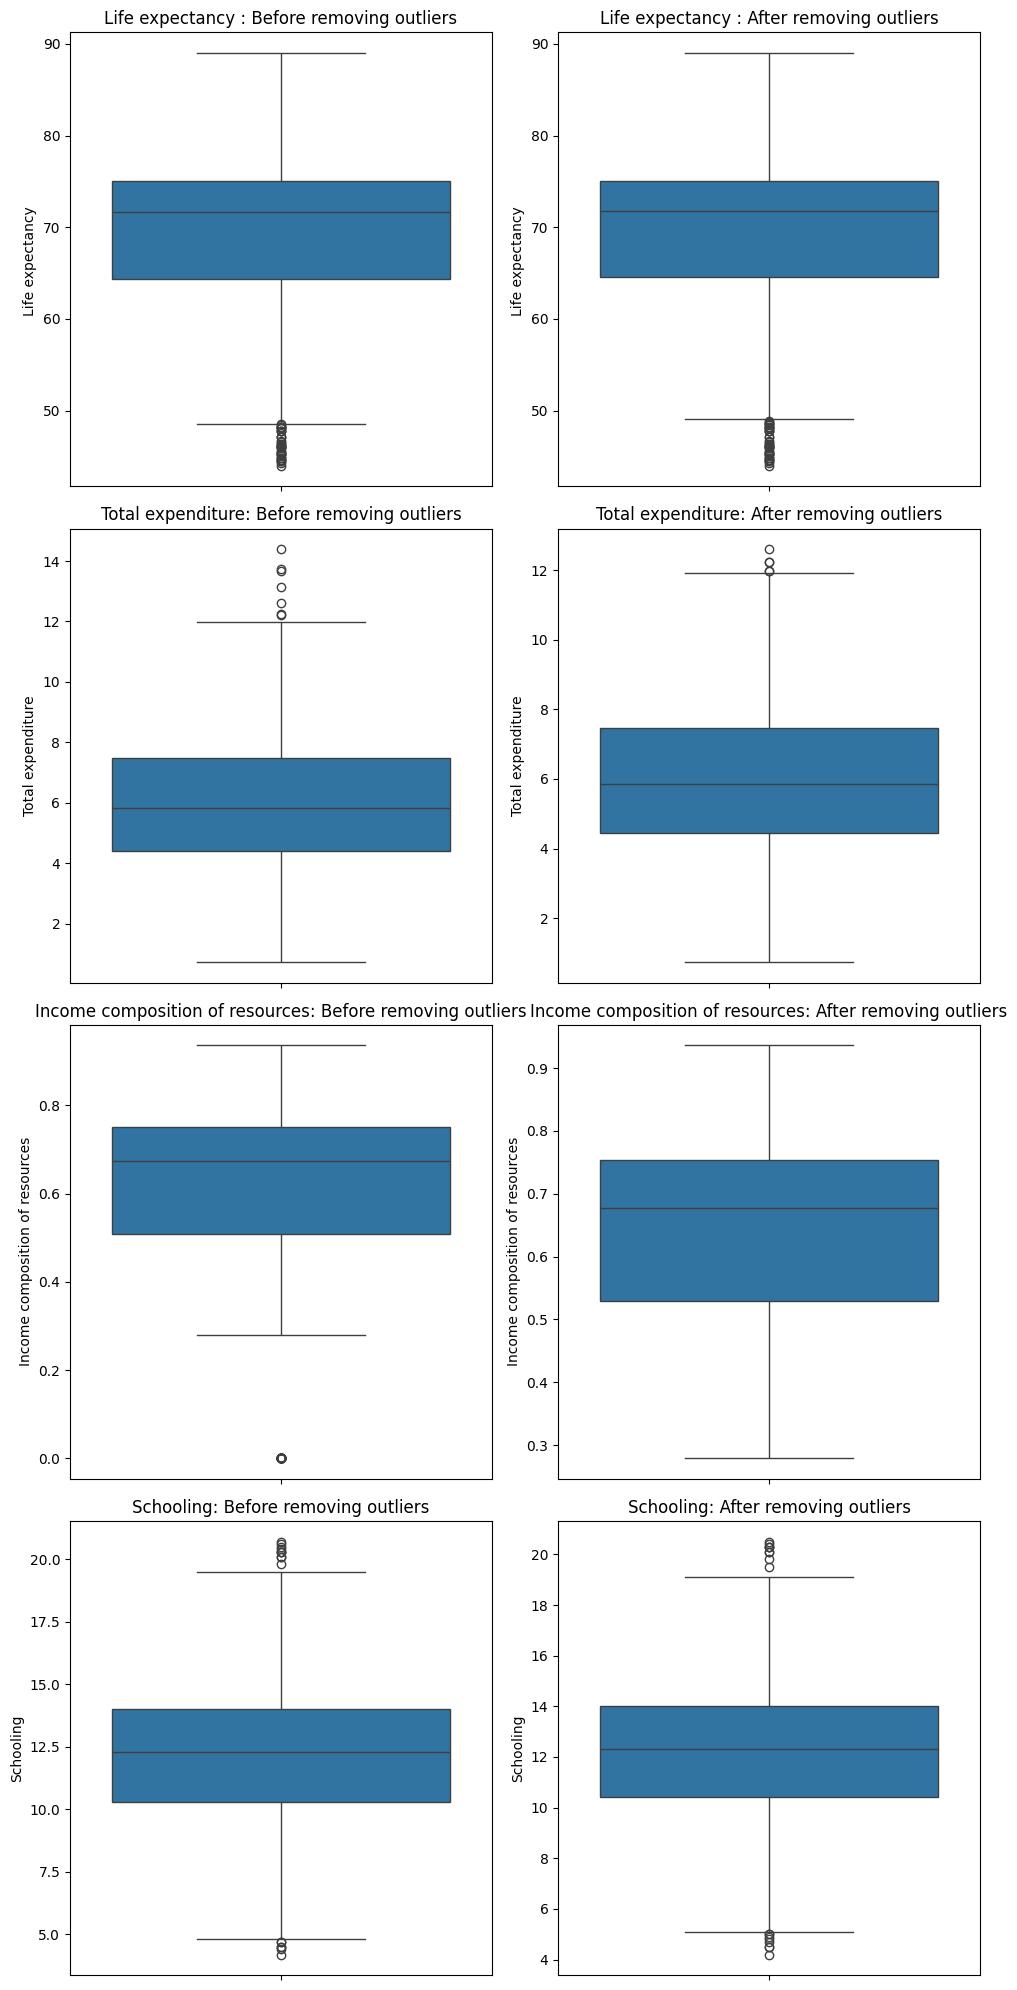

In [238]:
boxplot_before_and_after(df, new_df, bell_shaped_col)

# capping the value using z score


In [239]:
import numpy as np

def capping_using_zscore(df_1, col):
    upper_limit = df_1[col].mean() + 3 * df_1[col].std()
    lower_limit = df_1[col].mean() - 3 * df_1[col].std()
    
    # Apply capping
    df_1[col] = np.where(
        df_1[col] > upper_limit, upper_limit,
        np.where(df_1[col] < lower_limit, lower_limit, df_1[col])
    )
    return df_1


In [240]:
df_capped = capping_using_zscore(df,'Schooling')

In [241]:
df_capped.shape

(1649, 22)

<Axes: ylabel='Schooling'>

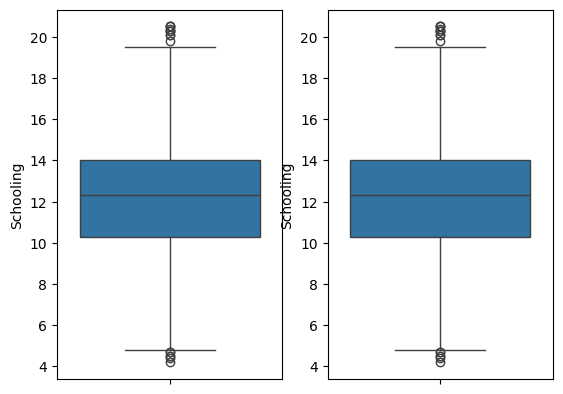

In [242]:
plt.subplot(1,2,1)
sns.boxplot(data = df, y = 'Schooling')
plt.subplot(1,2,2)
sns.boxplot(data = df_capped, y = 'Schooling')

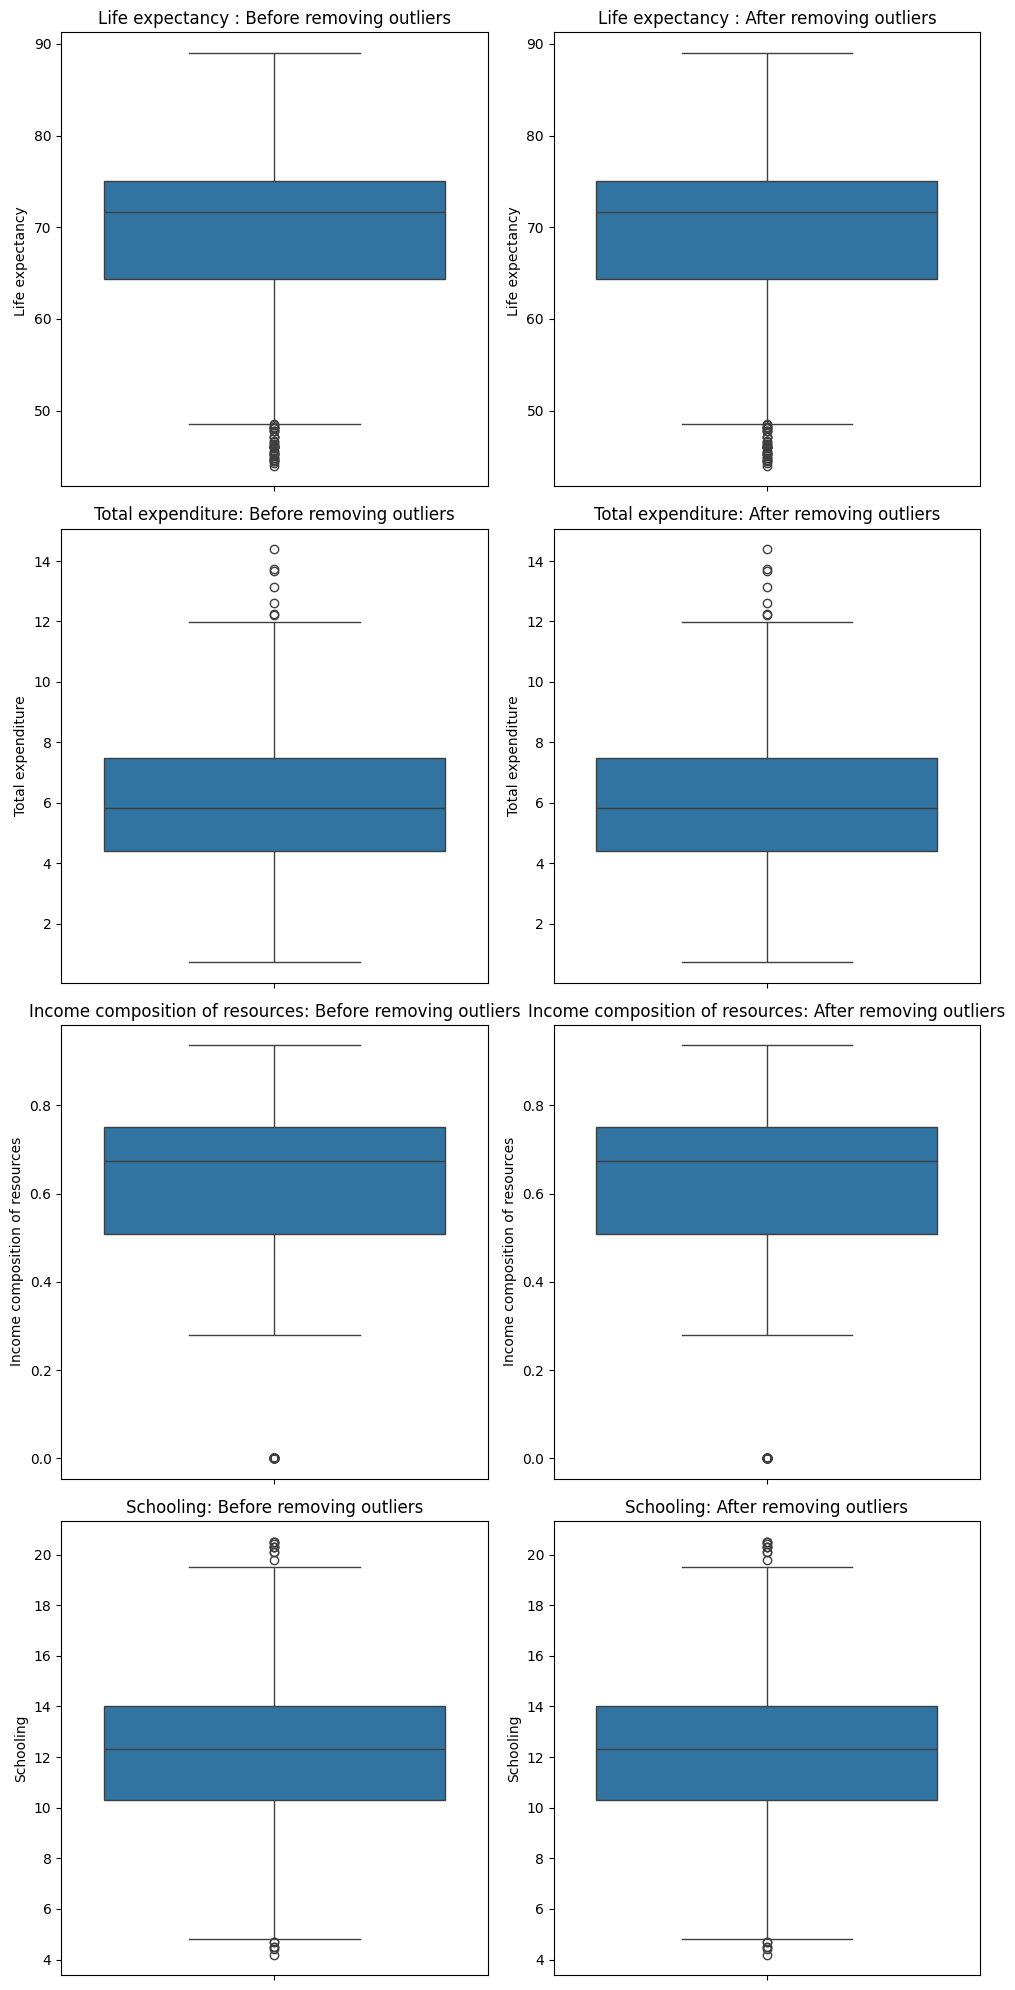

In [243]:
boxplot_before_and_after(df,df_capped,bell_shaped_col)

In [244]:
u_limit = df['Total expenditure'].mean() - 3*df['Total expenditure'].std()


In [245]:
df_capped[(df_capped['Total expenditure'] > upper_limit)]

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1386,65,2007,1,65.0,211.0,0,0.68,188.710877,96.0,0,73.4,0,93.0,13.66,94.0,0.1,1357.632211,96311.0,0.2,0.1,0.574,11.8
1496,69,2009,1,59.2,277.0,10,3.75,5.592170,64.0,6,24.0,13,84.0,14.39,81.0,2.1,33.667491,3811528.0,7.6,7.4,0.400,9.7
1603,75,2014,1,78.2,62.0,0,0.01,2051.748615,99.0,0,26.2,0,99.0,13.73,99.0,0.1,7716.241500,41.0,13.6,13.7,0.693,12.7
2303,108,2009,1,47.1,433.0,28,3.97,49.837127,84.0,31,21.2,42,81.0,13.13,84.0,1.7,394.593244,63126.0,8.5,8.4,0.375,8.5


<Axes: ylabel='Total expenditure'>

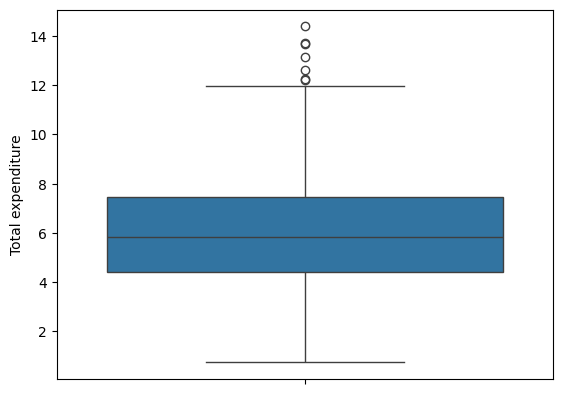

In [246]:
sns.boxplot(data = df, y = 'Total expenditure')